In [1]:
from rocketpy import Environment, SolidMotor, Rocket, Flight
import datetime

%matplotlib notebook
%matplotlib inline

In [2]:
# help(Environment)

In [3]:
Env = Environment(
    railLength=5,
    gravity=9.80665,
    longitude=37.0144, # East
    latitude=-1.1018, # South
)

tomorrow = datetime.datetime.today() + datetime.timedelta(days=1)

Env.setDate((tomorrow.year, tomorrow.month, tomorrow.day, 16)) 

Env.setAtmosphericModel(type='Forecast', file='GFS')

oc_open: server error retrieving url: code=0 message="/gfs_0p25/gfs20220318/gfs_0p25_00z is not an available dataset"/Users/shohei/.pyenv/versions/3.9.2/lib/python3.9/site-packages/rocketpy/Environment.py:1831: UserWarning: Exact chosen launch time is not available in the provided file, using 2022-03-19 15:00:00 UTC instead.
  warnings.warn(


Gravity Details

Acceleration of Gravity: 9.80665 m/s²


Launch Site Details

Launch Rail Length: 5  m
Launch Date: 2022-03-19 16:00:00 UTC
Launch Site Latitude: -1.10180°
Launch Site Longitude: 37.01440°
Launch Site Surface Elevation: 1553.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 79.939 km
Forecast Time Period: From  2022-03-17 18:00:00  to  2022-04-02 18:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 7.04 m/s
Surface Wind Direction: 87.02°
Surface Wind Heading: 267.02°
Surface Pressure: 842.57 hPa
Surface Temperature: 300.04 K
Surface Air Density: 0.978 kg/m³
Surface Speed of Sound: 347.24 m/s


Atmospheric Model Plots


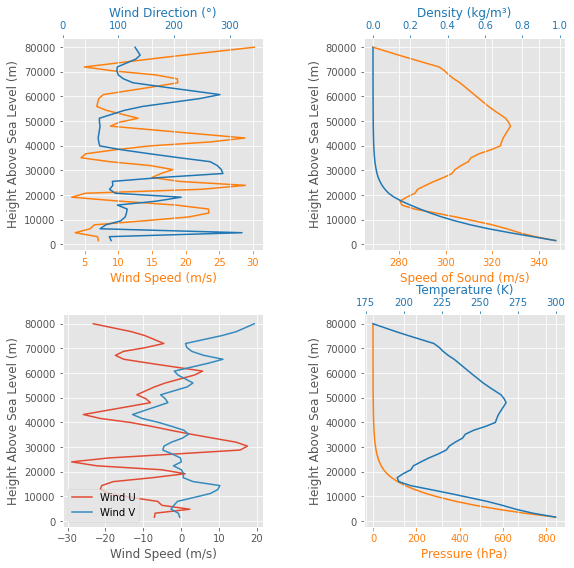

In [4]:
Env.allInfo()

Simulation Completed at Time: 600.0000 s
Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 1553.46 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Surface Wind Conditions

Frontal Surface Wind Speed: -3.03 m/s
Lateral Surface Wind Speed: 8.43 m/s


 Rail Departure State

Rail Departure Time: 0.000 s
Rail Departure Velocity: 0.000 m/s
Rail Departure Static Margin: 2.853 c
Rail Departure Angle of Attack: 88.314°
Rail Departure Thrust-Weight Ratio: 0.000
Rail Departure Reynolds Number: 6.007e+04


BurnOut State

BurnOut time: 3.000 s
Altitude at burnOut: 0.000 m (AGL)
Rocket velocity at burnOut: 0.000 m/s
Freestream velocity at burnOut: 8.961 m/s
Mach Number at burnOut: 0.026
Kinetic energy 

C:\Users\0x6f736f646f\OneDrive\Documents\Nakuja\airframeN2\Venv\lib\site-packages\rocketpy\Flight.py:2397: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax1.set_zlim3d([0, maxZ])
C:\Users\0x6f736f646f\OneDrive\Documents\Nakuja\airframeN2\Venv\lib\site-packages\rocketpy\Flight.py:2398: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax1.set_ylim3d([minXY, maxXY])
C:\Users\0x6f736f646f\OneDrive\Documents\Nakuja\airframeN2\Venv\lib\site-packages\rocketpy\Flight.py:2399: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax1.set_xlim3d([minXY, maxXY])


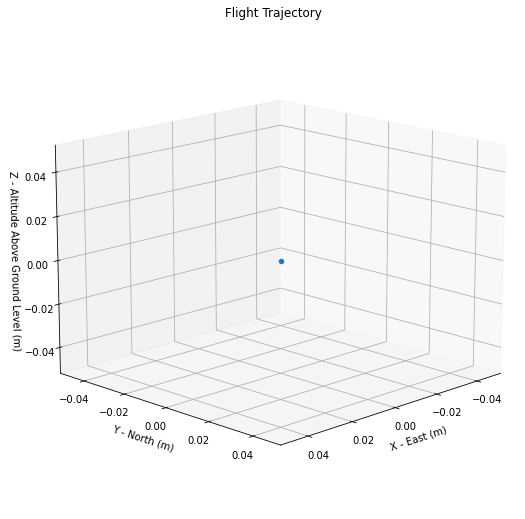



Trajectory Kinematic Plots



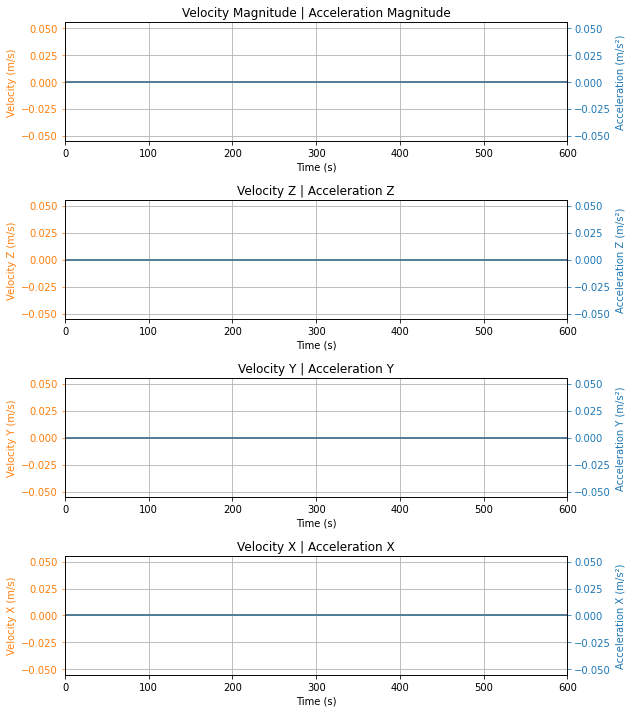



Angular Position Plots



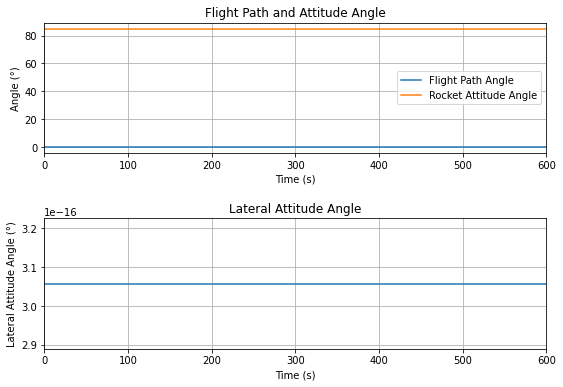



Path, Attitude and Lateral Attitude Angle plots



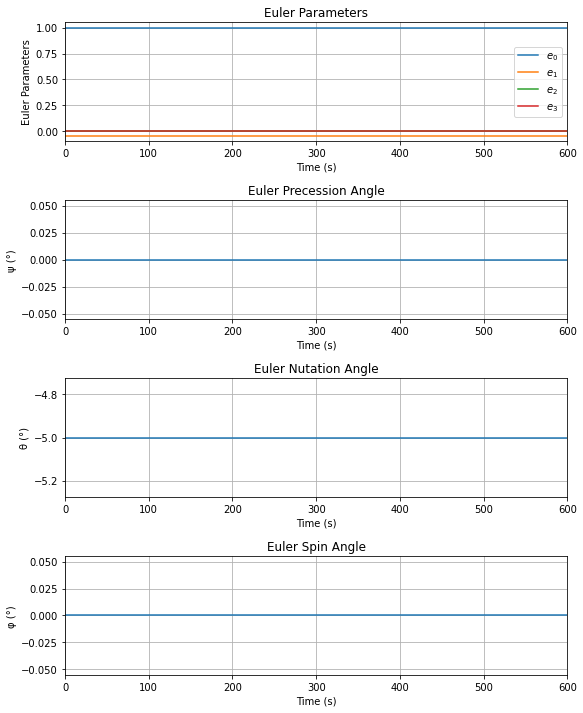



Trajectory Angular Velocity and Acceleration Plots



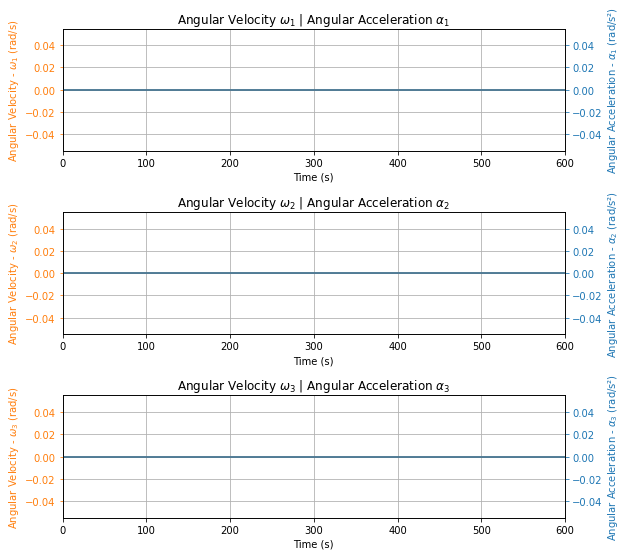



Trajectory Force Plots



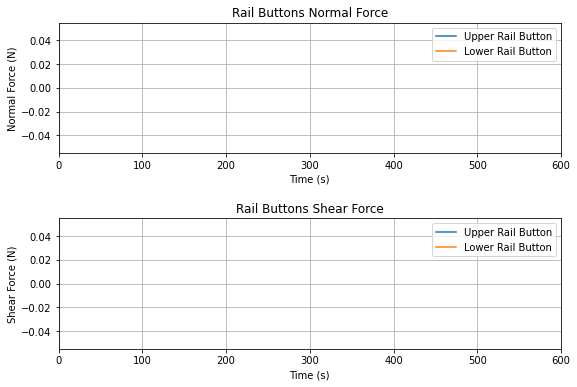

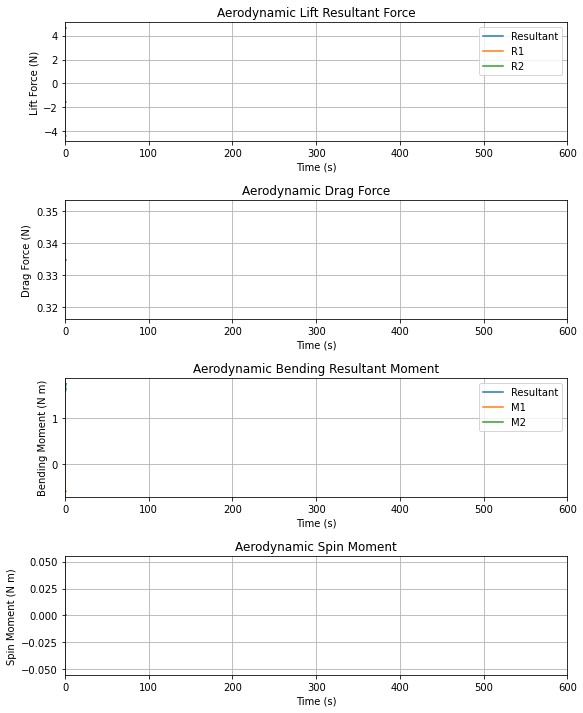



Trajectory Energy Plots



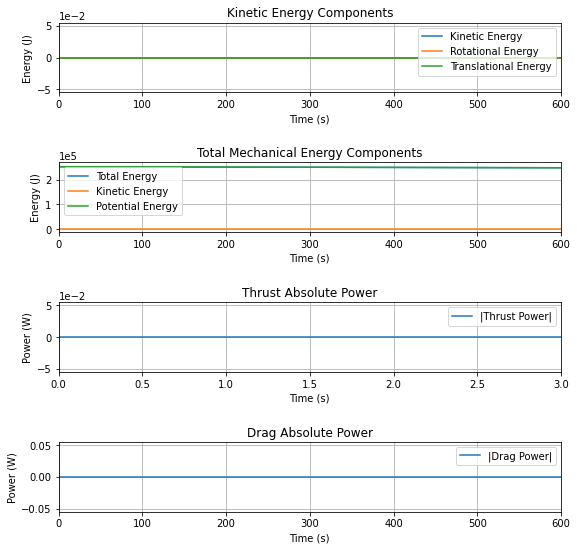



Trajectory Fluid Mechanics Plots



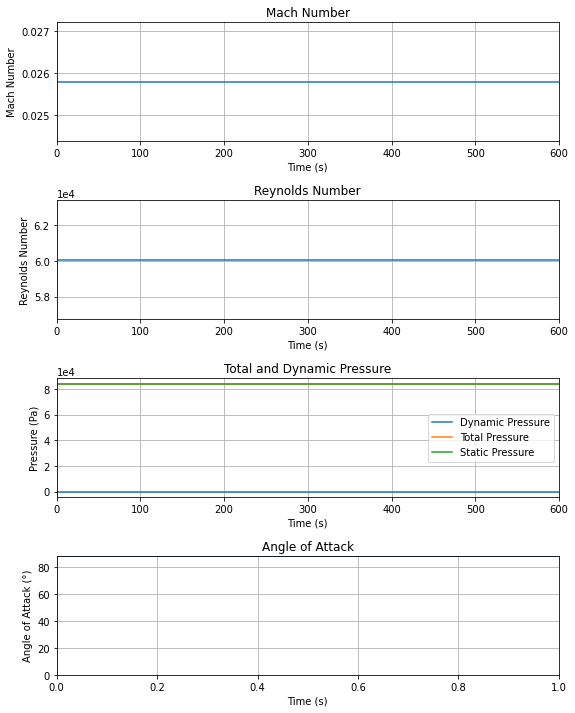



Trajectory Stability and Control Plots



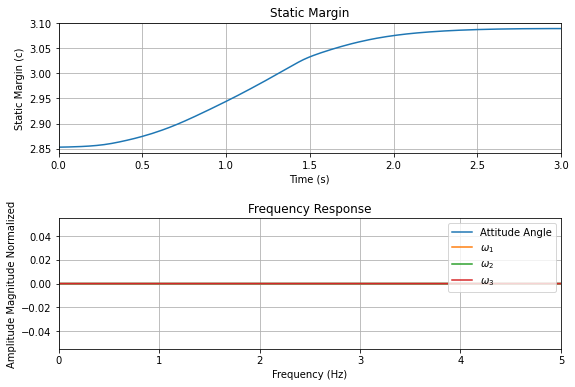

In [5]:
Pro75M1670 = SolidMotor(
    thrustSource="march_03.csv",
    burnOut=3,
    grainNumber=1,
    grainSeparation=0.005,
    grainDensity=1815,
    grainOuterRadius=0.033,
    grainInitialInnerRadius=0.015,
    grainInitialHeight=0.12,
    nozzleRadius=0.033,
    throatRadius=0.011,
    interpolationMethod="linear",
)


Calisto = Rocket(
    motor=Pro75M1670,
    radius=127 / 2000,
    mass=19.197 - 2.956,
    inertiaI=6.60,
    inertiaZ=0.0351,
    distanceRocketNozzle=-1.255,
    distanceRocketPropellant=-0.85704,
    powerOffDrag=0.675,
    powerOnDrag=0.675,
)

Calisto.setRailButtons([0.2, -0.5])

NoseCone = Calisto.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)

FinSet = Calisto.addFins(
    4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956
)

Tail = Calisto.addTail(
    topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656
)

def drogueTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate drogue when vz < 0 m/s.
    return True if y[5] < 0 else False


def mainTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate main when vz < 0 m/s and z < 800 m.
    return True if y[5] < 0 and y[2] < 800 else False


Main = Calisto.addParachute(
    "Main",
    CdS=10.0,
    trigger=mainTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Drogue = Calisto.addParachute(
    "Drogue",
    CdS=1.0,
    trigger=drogueTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)
TestFlight = Flight(rocket=Calisto, environment=Env, inclination=85, heading=0, verbose=True)

TestFlight.allInfo()